In [6]:
import numpy as np
import seaborn as sns
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

import graspy as gp
from graspy.plot import heatmap

In [ ]:
# 360-by-360 experiment.
p = 360
n = 1200
test_statistic_ = np.zeros((p,p))
optimal_lag_ = np.zeros((p,p))
optimal_scale_X_ = np.zeros((p,p))
optimal_scale_Y_ = np.zeros((p,p))

# Read files and combine into matrix.
for i in range(5):
    filename = "results/result_%d.pkl" % i
    pickle_in = open(filename,"rb")
    results = np.asarray(pickle.load(pickle_in))
    
    for result in results:
        # output = (i, j, test_statistic, optimal_lag, optimal_scale_X, optimal_scale_Y)
        k = int(result[0])
        l = int(result[1])
        test_statistic_[k,l] = result[2]
        optimal_lag_[k,l] = int(result[3])
        optimal_scale_X_[k,l] = result[4] / n
        optimal_scale_Y_[k,l] = result[5] / n

In [ ]:
# Map Parcels to correct indices.

# Read the specific ROIs needed for analysis.
roi_L = pd.read_csv(r"HCPMMP_To_Yeo7Network.csv")
roi_L.sort_values(by=' Yeo7Network_key', inplace = True)
roi_L.to_csv(path_or_buf = "roi_L.csv", index=False)
roi_R = pd.read_csv(r"HCPMMP_To_Yeo7Network_R.csv")
roi_L.sort_values(by=' Yeo7Network_key', inplace = True)
roi = np.concatenate((roi_L.values, roi_R.values))
roi[:,1] -= 1
roi[:,2] -= 1
roi[range(180,360), 1] += 180
roi_labels = np.unique(roi[:,3])
# print(roi[range(15), :])
# print(np.where(roi[:,1] == 6)[0][0])

test_statistic = np.zeros((p,p))
optimal_lag = np.zeros((p,p))
optimal_scale_X = np.zeros((p,p))
optimal_scale_Y = np.zeros((p,p))
for i in range(p):
    for j in range(p):
        k = np.where(roi[:,1] == i)[0][0]
        l = np.where(roi[:,1] == j)[0][0]
        
        test_statistic[k,l] = test_statistic_[i,j]
        optimal_lag[k,l] = optimal_lag_[i,j]
        optimal_scale_X[k,l] = optimal_scale_X_[i,j]
        optimal_scale_Y[k,l] = optimal_scale_Y_[i,j]

In [ ]:
# Visualize test statistic
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(test_statistic)
plt.title("MGCX Test Statistic, M = 1", fontsize = 20, y=-0.05)

# pick the labels you want
ticks = [12, 39, 75, 105, 121, 147, 192, 219, 255, 285, 302, 338]
ticklabels = ['Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN', 'Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN']

# display only the chosen ticks and ticklabels
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.xaxis.set_major_formatter(FixedFormatter(ticklabels))
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_formatter(FixedFormatter(ticklabels))

ax.xaxis.tick_top()
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)
plt.show()

In [ ]:
# Visualize optimal lag
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_lag)
plt.title("Optimal Lag, M = 1", fontsize = 20, y = -0.05)

# pick the labels you want
ticks = [12, 39, 75, 105, 121, 147, 192, 219, 255, 285, 302, 338]
ticklabels = ['Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN', 'Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN']

# display only the chosen ticks and ticklabels
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.xaxis.set_major_formatter(FixedFormatter(ticklabels))
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_formatter(FixedFormatter(ticklabels))

ax.xaxis.tick_top()
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)
plt.show()

In [ ]:
# Visualize optimal scale
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_X)
plt.title("Optimal Scale X, M = 1", fontsize = 20, y = -0.05)

# pick the labels you want
ticks = [12, 39, 75, 105, 121, 147, 192, 219, 255, 285, 302, 338]
ticklabels = ['Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN', 'Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN']

# display only the chosen ticks and ticklabels
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.xaxis.set_major_formatter(FixedFormatter(ticklabels))
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_formatter(FixedFormatter(ticklabels))

ax.xaxis.tick_top()
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)
plt.show()

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_Y)
plt.title("Optimal Scale Y, M = 1", fontsize = 20, y = -0.05)

# pick the labels you want
ticks = [12, 39, 75, 105, 121, 147, 192, 219, 255, 285, 302, 338]
ticklabels = ['Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN', 'Visual', 'Somatomotor', 'vAtt', 'Limbic', 'FrontoParietal', 'DMN']

# display only the chosen ticks and ticklabels
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.xaxis.set_major_formatter(FixedFormatter(ticklabels))
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.yaxis.set_major_formatter(FixedFormatter(ticklabels))

ax.xaxis.tick_top()
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)
plt.show()

In [ ]:
# 22-by-22 experiment, M=1
p = 22
n = 1200
test_statistic = np.zeros((p,p))
optimal_lag = np.zeros((p,p))
optimal_scale_X = np.zeros((p,p))
optimal_scale_Y = np.zeros((p,p))

# Read files and combine into matrix.
for i in range(4):
    filename = "results/result_22_%d.pkl" % i
    pickle_in = open(filename,"rb")
    results = np.asarray(pickle.load(pickle_in))
    
    for result in results:
        # output = (i, j, test_statistic, optimal_lag, optimal_scale_X, optimal_scale_Y)
        k = int(result[0])
        l = int(result[1])
        test_statistic[k,l] = result[2]
        optimal_lag[k,l] = int(result[3])
        optimal_scale_X[k,l] = result[4] / n
        optimal_scale_Y[k,l] = result[5] / n

# Read the specific ROIs needed for analysis.
roi = pd.read_excel(r"HCPMMP_ROIs.xlsx")
# roi_indices = np.asarray(roi["key"])[range(22)]
roi_labels = np.asarray(roi["Yeo7Network"])[range(22)]

In [ ]:
# Visualize test statistic.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(test_statistic)
plt.title("MGCX Test Statistic", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Visualize optimal lag.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_lag)
plt.title("Optimal Lag", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Visualize optimal scale.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_X)
plt.title("Optimal Scale X", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_Y)
plt.title("Optimal Scale Y", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [2]:
# 22-by-22 experiment, M=10
p = 22
n = 1200
test_statistic = np.zeros((p,p))
optimal_lag = np.zeros((p,p))
optimal_scale_X = np.zeros((p,p))
optimal_scale_Y = np.zeros((p,p))

# Read files and combine into matrix.
for i in range(11):
    filename = "results/result_10_22_%d.pkl" % i
    pickle_in = open(filename,"rb")
    results = np.asarray(pickle.load(pickle_in))
    
    for result in results:
        # output = (i, j, test_statistic, optimal_lag, optimal_scale_X, optimal_scale_Y)
        k = int(result[0])
        l = int(result[1])
        test_statistic[k,l] = result[2]
        optimal_lag[k,l] = int(result[3])
        optimal_scale_X[k,l] = result[4] / n
        optimal_scale_Y[k,l] = result[5] / n

# Read the specific ROIs needed for analysis.
roi = pd.read_excel(r"HCPMMP_ROIs.xlsx")
# roi_indices = np.asarray(roi["key"])[range(22)]
roi_labels = np.asarray(roi["Yeo7Network"])[range(22)]

In [ ]:
# Visualize test statistic.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(test_statistic)
plt.title("MGCX Test Statistic, M=10", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0, fontsize = 15)
plt.xticks(range(22), roi_labels, rotation=90, fontsize = 15)
plt.savefig('figures/test_stat.png')
plt.show()

In [ ]:
# Visualize optimal lag.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_lag, annot = True, annot_kws={"size": 15})
plt.title("Optimal Lag, M=10", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0, fontsize = 15)
plt.xticks(range(22), roi_labels, rotation=90, fontsize = 15)
plt.savefig('figures/opt_lag.png')
plt.show()

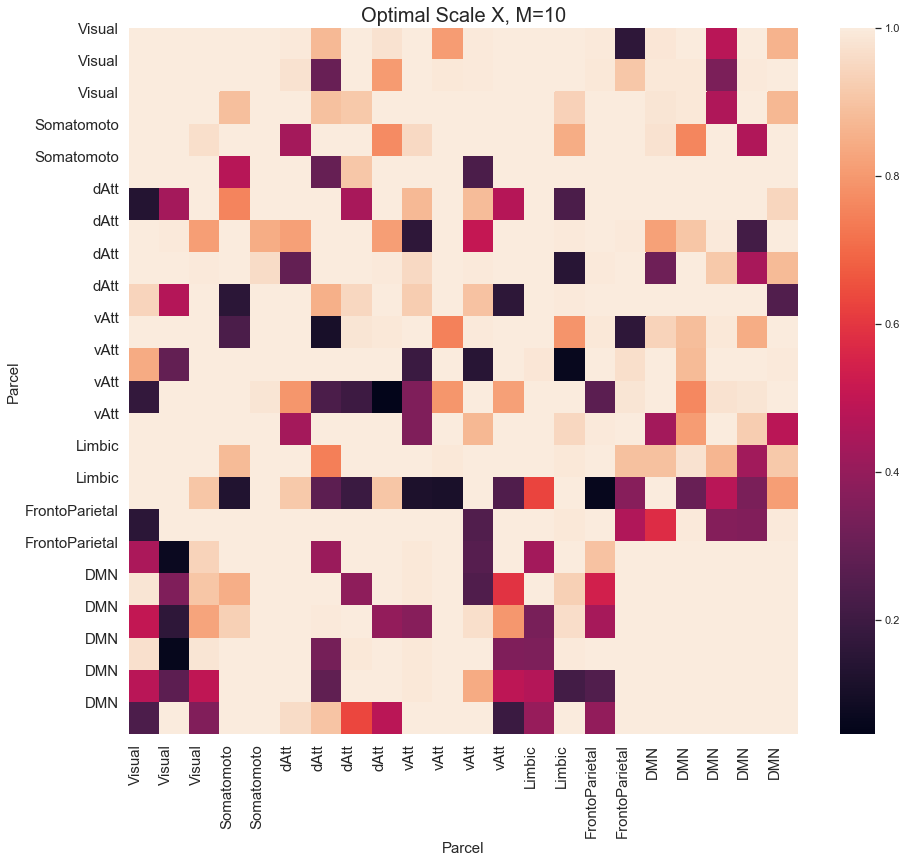

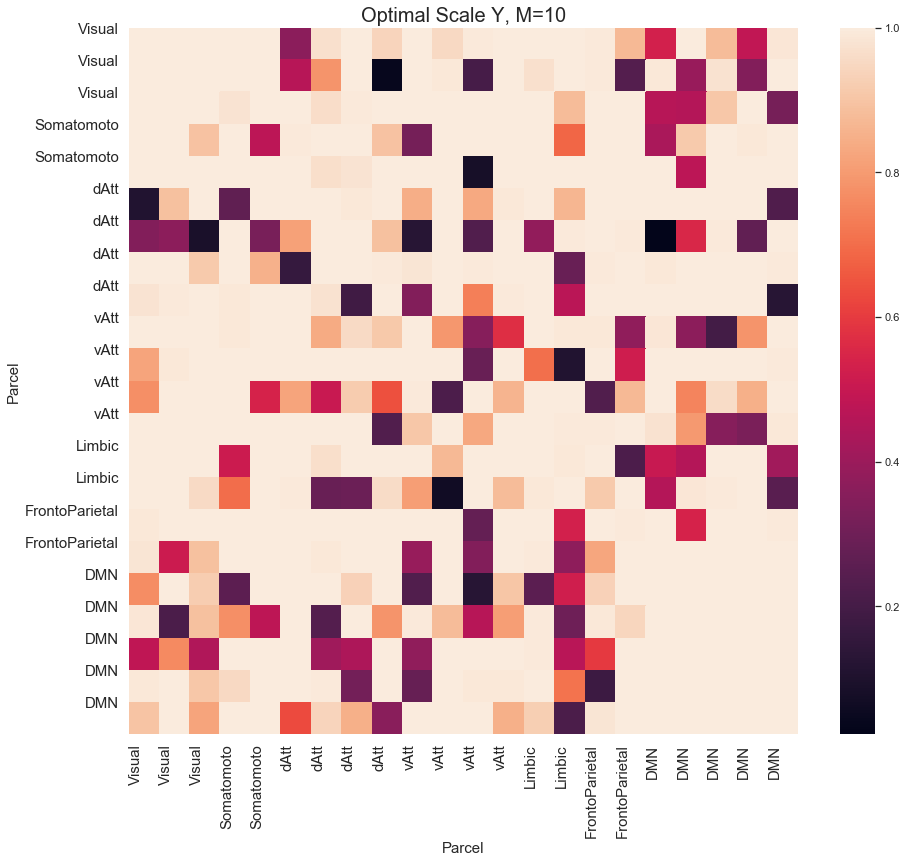

In [3]:
# Visualize optimal scale.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_X)
plt.title("Optimal Scale X, M=10", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0, fontsize = 15)
plt.xticks(range(22), roi_labels, rotation=90, fontsize = 15)
plt.savefig('figures/opt_scale_X.png')
plt.show()

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_Y)
plt.title("Optimal Scale Y, M=10", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0, fontsize = 15)
plt.xticks(range(22), roi_labels, rotation=90, fontsize = 15)
plt.savefig('figures/opt_scale_Y.png')
plt.show()

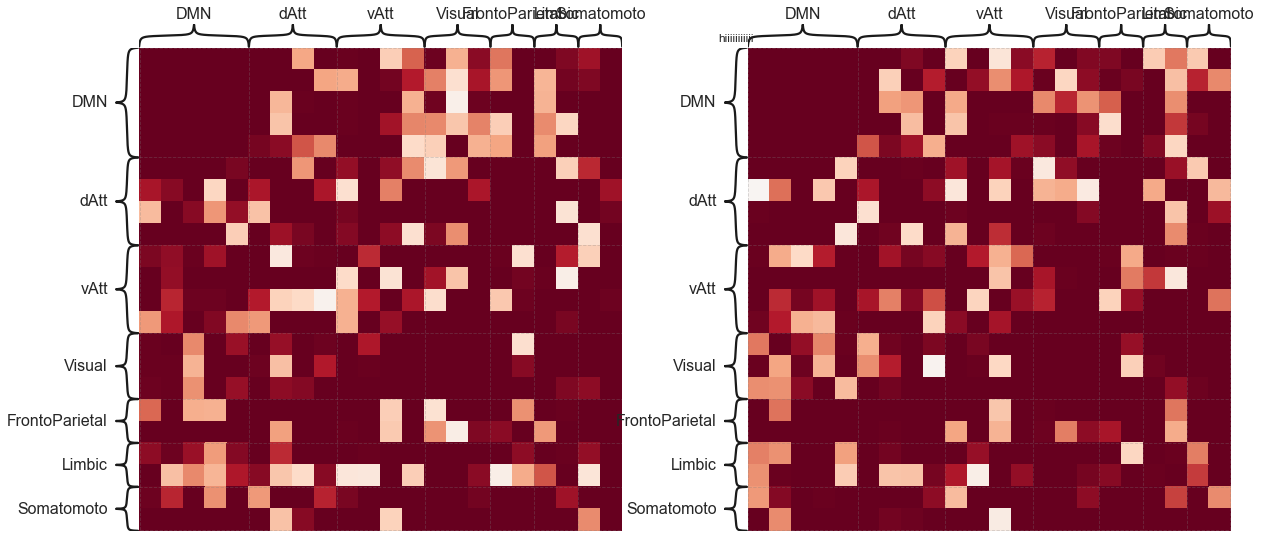

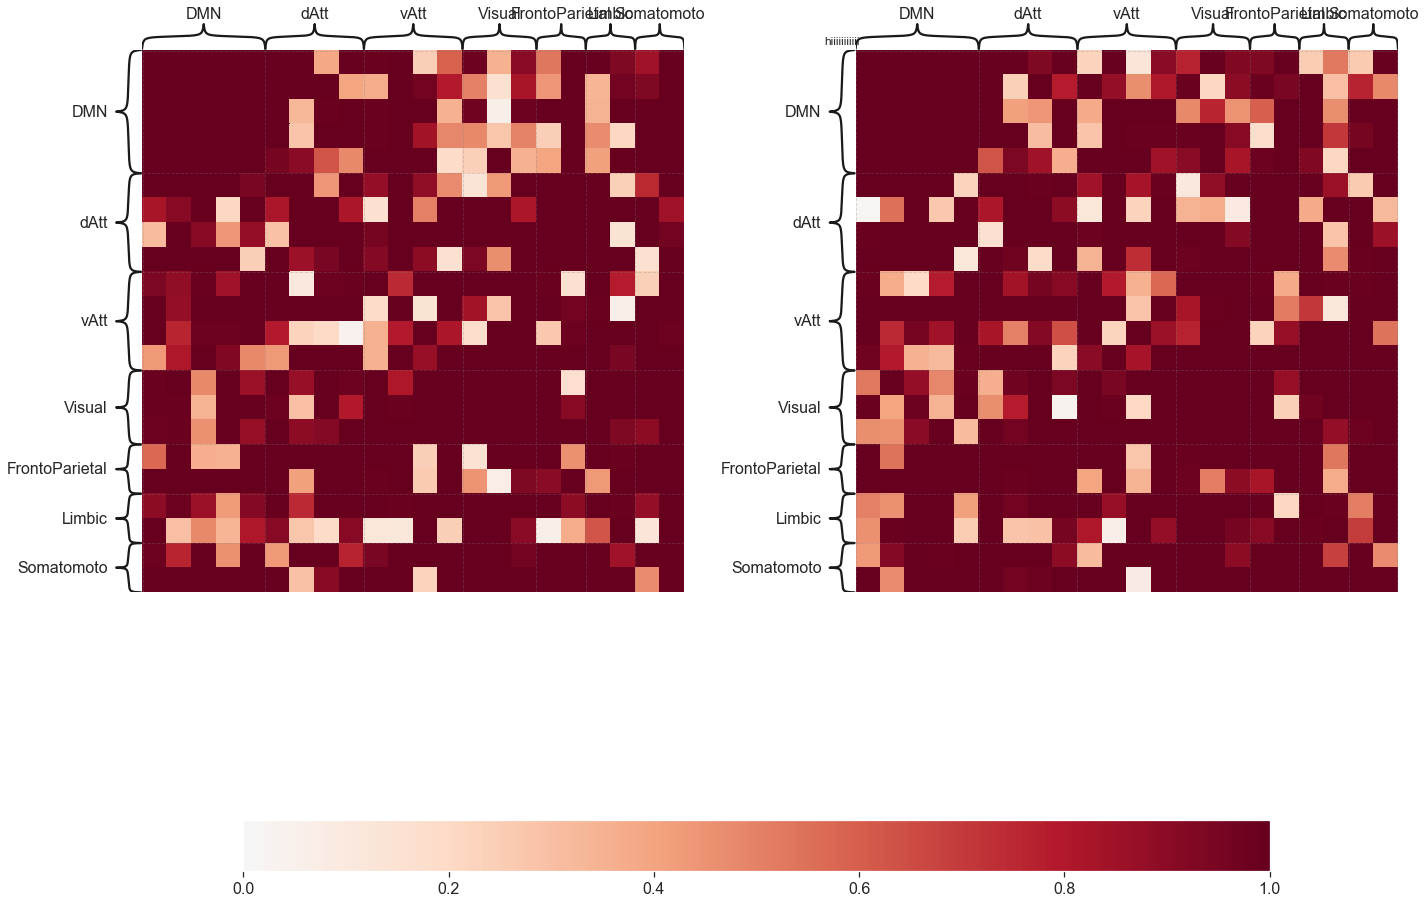

In [18]:
# Plotting
import matplotlib as mpl

np.random.seed(8888)

cmap = mpl.cm.get_cmap("RdBu_r")
center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256)
cmap = mpl.colors.ListedColormap(cmap(cc))

heatmap_kws = dict(
    cbar=False,
    font_scale=1.4,
    vmin=0,
    vmax=1,
    inner_hier_labels=roi_labels,
    hier_label_fontsize=16,
    cmap=cmap,
    center=None,
)
side_label_kws = dict(labelpad=45, fontsize=24)


fig, ax = plt.subplots(1, 2, figsize=(20, 16))

# SBM
heatmap(optimal_scale_X, ax=ax[0], **heatmap_kws)
heatmap(optimal_scale_Y, ax=ax[1], **heatmap_kws)
plt.title("hiiiiiiiiiii")

plt.tight_layout()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(optimal_scale_X)
cbar = fig.colorbar(
    sm, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8, fraction=0.1
)
cbar.ax.tick_params(labelsize=16)

plt.savefig(
    "optimal_scale.png",
    facecolor="w",
    format="png",
    bbox_inches="tight",
)

plt.show()

In [ ]:
# 22-by-22 experiment, M=1
p = 22
n = 1200
p_value = np.zeros((p,p))

# Read files and combine into matrix.
for i in range(11):
    filename = "results/result_1_22_%d.pkl" % i
    pickle_in = open(filename,"rb")
    results = np.asarray(pickle.load(pickle_in))
    
    for result in results:
        # output = (i, j, test_statistic, optimal_lag, optimal_scale_X, optimal_scale_Y)
        k = int(result[0])
        l = int(result[1])
        p_value[k,l] = result[6]

        
p_value = (1000*p_value + 1) / 1001

# Read the specific ROIs needed for analysis.
roi = pd.read_excel(r"HCPMMP_ROIs.xlsx")
# roi_indices = np.asarray(roi["key"])[range(22)]
roi_labels = np.asarray(roi["Yeo7Network"])[range(22)]

In [ ]:
# Visualize p-value.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(p_value, cmap="RdYlBu")
plt.title("MGCX p-value, M=1", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Visualize log p-value.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(-np.log(p_value), cmap="RdYlBu_r")
plt.title("MGCX -log(p-value), M=1", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0, fontsize = 15)
plt.xticks(range(22), roi_labels, rotation=90, fontsize = 15)
plt.savefig('figures/neg_log_p_val.png')
plt.show()